In [ ]:
# 2)	Read the daily confirmed cases and deaths into two dataframes
import pandas as pd
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

In [ ]:
deaths_df.head() # deaths dataframe

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925


In [ ]:
confirmed_cases_df.head() # confirmed cases dataframe

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750


In [ ]:
# 3) Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level


confirmed_cases_df.drop(['Lat','Long','Province/State'],axis=1,inplace=True)
deaths_df.drop(['Lat','Long','Province/State'],axis=1,inplace=True)

confirmed_cases_df = confirmed_cases_df.melt(['Country/Region'],var_name="Date",value_name='Confirmed cases')
deaths_df = deaths_df.melt(['Country/Region'],var_name="Date",value_name='Deaths')



combined_df = pd.merge(deaths_df,confirmed_cases_df,how="left",on=["Country/Region","Date"])
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors ='coerce')
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year']= combined_df['Date'].dt.year

total_count_df = combined_df.groupby(["Month",'Year'])['Deaths', 'Confirmed cases'].sum().reset_index()

combined_df.drop('Country/Region',axis=1,inplace=True)
total_count_df

<ipython-input-282-cba7dcec293b>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_count_df = combined_df.groupby(["Month",'Year'])['Deaths', 'Confirmed cases'].sum().reset_index()


,Month,Year,Deaths,Confirmed cases
0,1,2020,30256,1293895
1,1,2021,153849366,5928223234
2,1,2022,318977900,24137346265
3,2,2020,1579856,55594837
4,2,2021,166435187,6319497310
5,2,2022,302642889,28370153842
6,3,2020,4330844,102357235
7,3,2021,201133832,7774336234
8,3,2022,351252282,35938535527
9,4,2020,25063541,253534057


In [ ]:
"""
Stocks selected for the industries are listed below : 
Overall American market - NASDX
Overall Canadian market - S&P/TSX
Travel sector - Booking Holdings (BKNG)
Real estate - Prologis, Inc. (PLD)
Precious metals - Newmont Corporation (NEM)

"""

'\nStocks selected for the industries are listed below : \nOverall American market - NASDX\nOverall Canadian market - S&P/TSX\nTravel sector - Booking Holdings (BKNG)\nReal estate - Prologis, Inc. (PLD)\nPrecious metals - Newmont Corporation (NEM)\n\n'

In [ ]:
pip install alpha-vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from alpha_vantage.timeseries import TimeSeries


In [ ]:
api_key = "ZS9T8P58GIU3RR28"
ts = TimeSeries(key=api_key,output_format='pandas')

#stocks
overall_american_stock = ts.get_weekly_adjusted('NASDX')
overall_canadian_stock = ts.get_weekly_adjusted('S&P/TSX')
travel_stock = ts.get_weekly_adjusted('BKNG') 
real_estate_stock = ts.get_weekly_adjusted('PLD')
precious_metal_stock = ts.get_weekly_adjusted('NEM')

In [ ]:
overall_american_stock_df = pd.DataFrame(overall_american_stock[0]).reset_index()
overall_canadian_stock_df = pd.DataFrame(overall_canadian_stock[0]).reset_index()
travel_stock_df = pd.DataFrame(travel_stock[0]).reset_index()
real_estate_stock_df = pd.DataFrame(real_estate_stock[0]).reset_index()
precious_metal_stock_df = pd.DataFrame(precious_metal_stock[0]).reset_index()

In [305]:
# 5) Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

for stock in [overall_american_stock_df,overall_canadian_stock_df,travel_stock_df,real_estate_stock_df,precious_metal_stock_df]:
    stock.rename(columns = {'date':'Date','2. high':'High','3. low':'Low'}, inplace = True)

overall_american_stock_df=overall_american_stock_df[['Date','High','Low']]
overall_american_stock_df['Date'] = pd.to_datetime(overall_american_stock_df['Date'], errors ='coerce')
overall_american_stock_df['Month'] = overall_american_stock_df['Date'].dt.month
overall_american_stock_df['Year']= overall_american_stock_df['Date'].dt.year

real_estate_stock_df=real_estate_stock_df[['Date','High','Low']]
real_estate_stock_df['Date'] = pd.to_datetime(real_estate_stock_df['Date'], errors ='coerce')
real_estate_stock_df['Month'] = real_estate_stock_df['Date'].dt.month
real_estate_stock_df['Year']= real_estate_stock_df['Date'].dt.year



<ipython-input-305-f399cbec2091>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_american_stock_df['Date'] = pd.to_datetime(overall_american_stock_df['Date'], errors ='coerce')


In [ ]:
# 6) Append that info to the data frame created in step 3)
# 1. NASDX
import numpy as np



df_final_america = pd.merge(total_count_df,overall_american_stock_df,on=['Month','Year'])


df_final_america



,Month,Year,Deaths,Confirmed cases,Date,High,Low
0,1,2020,30256,1293895,2020-01-31,20.88,20.46
1,1,2020,30256,1293895,2020-01-24,21.07,20.90
2,1,2020,30256,1293895,2020-01-17,20.97,20.65
3,1,2020,30256,1293895,2020-01-10,20.55,20.21
4,1,2020,30256,1293895,2020-01-03,20.27,19.91
...,...,...,...,...,...,...,...
148,12,2021,306736733,17852796980,2021-12-23,36.25,34.74
149,12,2021,306736733,17852796980,2021-12-17,36.21,35.12
150,12,2021,306736733,17852796980,2021-12-10,36.44,35.23
151,12,2021,306736733,17852796980,2021-12-03,37.33,34.93


<Figure size 432x288 with 0 Axes>

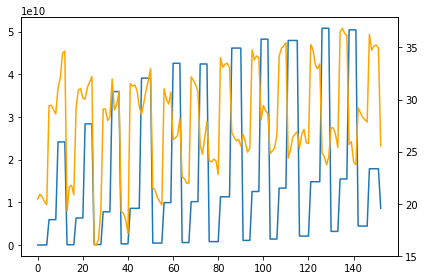

In [304]:
# 7)Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



fig_zoom_sfm = plt.gcf()


fig_zoom_sfm, ax1 = plt.subplots()
ax1.plot(df_final_america['Confirmed cases'])
ax2 = ax1.twinx()
ax2.plot(df_final_america['Low'],color="orange")
fig_zoom_sfm.tight_layout()
plt.show()



As you can observe, as the confirmed cases increases the low values in the stock NASDX also increases, ie., the stock value of NASDX is also going down with the increasing covid cases.

In [306]:
# 6) Append that info to the data frame created in step 3)
# 4. PLD
import numpy as np



df_final_real_estate = pd.merge(total_count_df,real_estate_stock_df,on=['Month','Year'])


df_final_real_estate



,Month,Year,Deaths,Confirmed cases,Date,High,Low
0,1,2020,30256,1293895,2020-01-31,96.96,92.510
1,1,2020,30256,1293895,2020-01-24,96.78,93.120
2,1,2020,30256,1293895,2020-01-17,94.78,89.500
3,1,2020,30256,1293895,2020-01-10,89.81,87.880
4,1,2020,30256,1293895,2020-01-03,89.86,87.550
...,...,...,...,...,...,...,...
149,12,2021,306736733,17852796980,2021-12-17,165.08,157.150
150,12,2021,306736733,17852796980,2021-12-10,161.11,154.760
151,12,2021,306736733,17852796980,2021-12-03,157.51,150.120
152,12,2022,64315496,8595206474,2022-12-05,116.24,113.735


<Figure size 432x288 with 0 Axes>

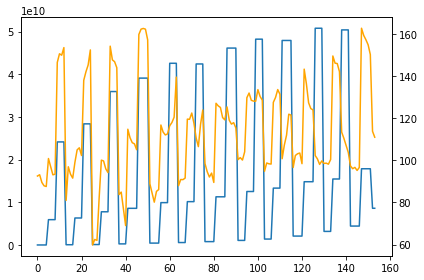

In [307]:
# 7)Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



fig_zoom_sfm = plt.gcf()


fig_zoom_sfm, ax1 = plt.subplots()
ax1.plot(df_final_real_estate['Confirmed cases'])
ax2 = ax1.twinx()
ax2.plot(df_final_real_estate['Low'],color="orange")
fig_zoom_sfm.tight_layout()
plt.show()



As you can observe, as the confirmed cases increases the low values in the stock PLD also increases, ie., the stock value of PLD is also going down with the increasing covid cases.